In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=18c88aa57a10a47e78b50291bcfc44e5


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | mango
Processing Record 6 of Set 1 | bambous virieux
Processing Record 7 of Set 1 | byron bay
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | raudeberg
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | myanaung
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | cairns
Processing Record 19 of Set 1 | mehamn
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | saint-dizier
Processing Record 22 of Set 1 

City not found. Skipping...
Processing Record 38 of Set 4 | betsiamites
Processing Record 39 of Set 4 | lydenburg
Processing Record 40 of Set 4 | lolua
City not found. Skipping...
Processing Record 41 of Set 4 | bethel
Processing Record 42 of Set 4 | uchiza
Processing Record 43 of Set 4 | rungata
City not found. Skipping...
Processing Record 44 of Set 4 | olafsvik
Processing Record 45 of Set 4 | grand-santi
Processing Record 46 of Set 4 | cordoba
Processing Record 47 of Set 4 | ozernovskiy
Processing Record 48 of Set 4 | lorengau
Processing Record 49 of Set 4 | nioro
Processing Record 50 of Set 4 | mecca
Processing Record 1 of Set 5 | mahebourg
Processing Record 2 of Set 5 | resistencia
Processing Record 3 of Set 5 | rio gallegos
Processing Record 4 of Set 5 | lhokseumawe
Processing Record 5 of Set 5 | svetlogorsk
Processing Record 6 of Set 5 | wynyard
Processing Record 7 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 5 | rocha
Processing Record 9 of Set 

Processing Record 28 of Set 8 | aliwal north
Processing Record 29 of Set 8 | norman wells
Processing Record 30 of Set 8 | mergui
City not found. Skipping...
Processing Record 31 of Set 8 | havre
Processing Record 32 of Set 8 | severo-kurilsk
Processing Record 33 of Set 8 | dalbandin
Processing Record 34 of Set 8 | qaqortoq
Processing Record 35 of Set 8 | belaya gora
Processing Record 36 of Set 8 | havoysund
Processing Record 37 of Set 8 | madang
Processing Record 38 of Set 8 | lantawan
Processing Record 39 of Set 8 | paamiut
Processing Record 40 of Set 8 | catuday
Processing Record 41 of Set 8 | mount gambier
Processing Record 42 of Set 8 | sistranda
Processing Record 43 of Set 8 | xining
Processing Record 44 of Set 8 | los angeles
Processing Record 45 of Set 8 | tawnat
City not found. Skipping...
Processing Record 46 of Set 8 | oktyabrskiy
Processing Record 47 of Set 8 | aksarka
Processing Record 48 of Set 8 | bojnurd
Processing Record 49 of Set 8 | karaul
City not found. Skipping...


Processing Record 16 of Set 12 | nanakuli
Processing Record 17 of Set 12 | yumen
Processing Record 18 of Set 12 | pokanayevka
City not found. Skipping...
Processing Record 19 of Set 12 | khawhai
Processing Record 20 of Set 12 | narsaq
Processing Record 21 of Set 12 | othonoi
City not found. Skipping...
Processing Record 22 of Set 12 | amga
Processing Record 23 of Set 12 | moose factory
Processing Record 24 of Set 12 | bacolod
Processing Record 25 of Set 12 | alyangula
Processing Record 26 of Set 12 | pioner
Processing Record 27 of Set 12 | honningsvag
Processing Record 28 of Set 12 | merauke
Processing Record 29 of Set 12 | kyabe
Processing Record 30 of Set 12 | nurota
Processing Record 31 of Set 12 | stoyba
City not found. Skipping...
Processing Record 32 of Set 12 | aanekoski
Processing Record 33 of Set 12 | sagua la grande
Processing Record 34 of Set 12 | ucluelet
Processing Record 35 of Set 12 | vikhorevka
Processing Record 36 of Set 12 | casablanca
Processing Record 37 of Set 12 |

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-08-19 02:08:48,-53.15,-70.92,32.00,87,31,9.17
1,Busselton,AU,2020-08-19 02:08:49,-33.65,115.33,57.99,64,15,2.73
2,Port Elizabeth,ZA,2020-08-19 02:06:21,-33.92,25.57,50.00,87,75,19.46
3,Mango,US,2020-08-19 02:08:50,27.98,-82.31,77.00,94,1,3.71
4,Bambous Virieux,MU,2020-08-19 02:08:50,-20.34,57.76,71.60,68,40,10.29
5,Byron Bay,AU,2020-08-19 02:06:18,-28.65,153.62,75.20,23,0,17.22
6,Puerto Ayora,EC,2020-08-19 02:08:51,-0.74,-90.35,66.99,95,84,4.00
7,Raudeberg,NO,2020-08-19 02:08:51,61.99,5.14,64.00,86,14,2.77
8,Hilo,US,2020-08-19 02:08:52,19.73,-155.09,82.40,61,90,4.70
9,Jamestown,US,2020-08-19 02:08:52,42.10,-79.24,64.99,77,1,6.93


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/18/20'

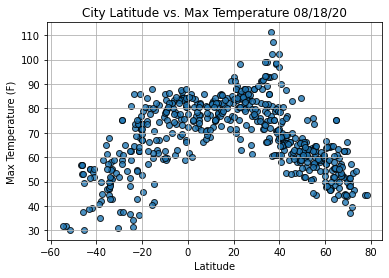

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

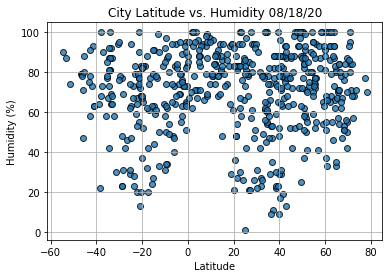

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

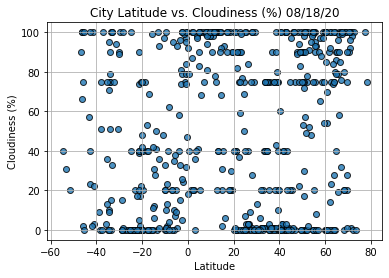

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

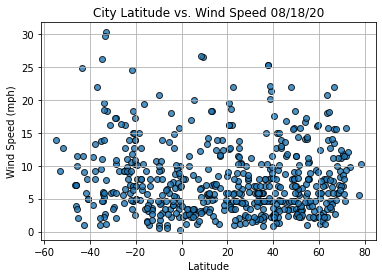

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

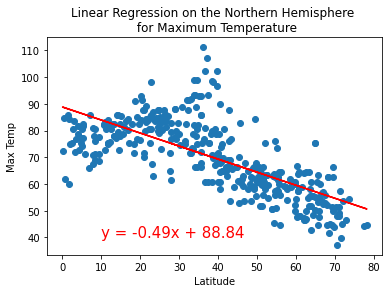

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

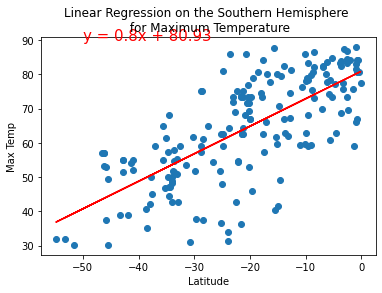

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

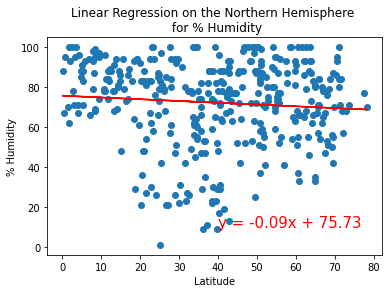

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

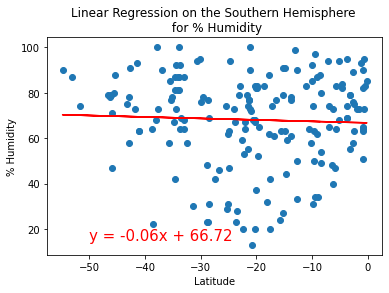

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

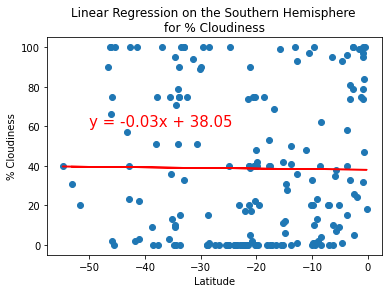

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

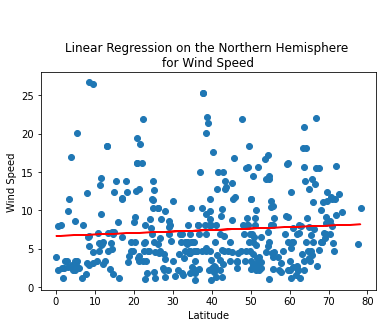

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

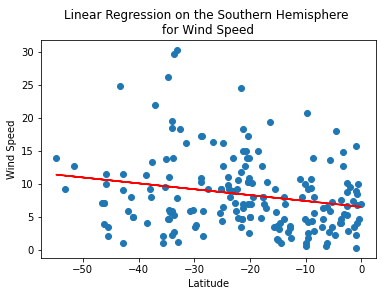

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))